# Исследование рынка компьютерных игр


**Описание проекта**

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цели исследования**

1. Выявить определяющие успешность игры закономерности.
2. Определить потенциально популярный продукт, чтобы спланировать рекламные кампании.

**Ход исследования**

Архивные данные о продажах игр, оценки пользователей и экспертов, жанры и платформы находятся в файле `'/datasets/games.csv'`. Прежде, чем начать анализ, взглянем на данные.

Проверим данные на предмет пропусков, ошибок и аномалий, после чего постараемся исправить выявленные в данных проблемы, при этом сделать это нужно максимально аккуратно во избежание искажения общего облика данных.

Исследование будет включать в себя следующие этапы:

- обзор данных;
- предобработка данных;
- проведение исследовательского анализа данных;
- составление портрета пользователя каждого региона;
- проверка гипотез;
- общий вывод.

### Изучение общей информации

In [1]:
# импортируем библиотеки, с которыми собираемся работать
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
# посмотрим общую информацию о датафрейме
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# выведем 15 первых строк датафрейма
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Предобработка данных

In [4]:
# приведем названия столбцов к "змеиному" регистру
data.columns = data.columns.str.lower()

In [5]:
# сразу проверим на явные дубликаты
data.duplicated().sum()

0

In [6]:
# посмотрим есть ли пропущенные значения
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# проверим колличество пропусков в %
pd.DataFrame(data.isna().mean()*100).style.background_gradient('coolwarm')

,0
name,0.011965
platform,0.000000
year_of_release,1.609333
genre,0.011965
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319174
user_score,40.089740


In [8]:
# посмотрим на два пропущенных значения в столбцах 'name' и 'genre'
data[(data['name'].isnull() == True) & (data['genre'].isnull() == True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбцах `'name'` и `'genre'` имеется две строки с пропущенными значениями. Т.к. объем данных крайне мал и нет возможности восстановить эти данные, то просто удалим эти строки.

In [9]:
data = data.dropna(subset=['name']).reset_index(drop=True)

In [10]:
data[data['year_of_release'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Также имеется 269 пропусков в столбце `'year_of_release'`, и т.к. объем небольшой, порядка 1.6% от всего объема датафрейма, то также удалим эти строки, это не исказит облик данных. Данные пропуски могли стать результатом сбоя при выгрузке данных.

In [11]:
# удаляем пропуски
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

Проверим столбцы датафрейма на неявные дубликаты, для этого посмотрим содержание некоторых столбцов.

In [12]:
data['name'].value_counts()

Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
FIFA 14                                    9
Ratatouille                                9
Madden NFL 08                              8
                                          ..
Crisis Core: Final Fantasy VII             1
Tiger Woods PGA Tour 2002                  1
Super Formation Soccer 94                  1
Yu-Gi-Oh! World Championship 2008          1
Paws & Claws: Dogs & Cats Best Friends     1
Name: name, Length: 11426, dtype: int64

In [13]:
data['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [14]:
data['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [15]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.2       2
1.5       2
0.7       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [16]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

В столбце `'name'` присутствуют одинаковые названия, это связано с тем, что одна игра может выходить на разных платформах. В столбце `'user_score'` большое количество строк содержит аббревиатуру 'tbd', которая расшифровывается как To Be Determined, то есть "Будет определено", соответственно, будем считать, что пока оценок пользователей нет, то значения отсутствуют и можно заменить 'tbd' на nan, чтобы при дальнейшем анализе данные значения не учитывались.

In [17]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

В столбце `'rating'` содержится информация о рейтинге ESRB. Вот расшифровка:
- "E" ("Everyone") — "Для всех", первоначально "K-A" ("Kids to Adults")
- "T" ("Teen") — "Подросткам"
- "M" ("Mature") — "Для взрослых"
- "E10+" ("Everyone 10 and older") — "Для всех от 10 лет и старше"
- "EC" ("Early childhood") — "Для детей младшего возраста"
- "RP" ("Rating Pending") — "Рейтинг ожидается"
- "AO" ("Adults Only 18+") — "Только для взрослых"

Заменим значение "K-A" на "E", т.к. это одно и то же.

In [18]:
data.loc[(data['rating'] == 'K-A'), 'rating'] = 'E'

Часть пропусков в столбце `'rating'` может быть связана с тем, что организация Entertainment Software Rating Board (ESRB)  занимается определением рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в **США и Канаде** и для других регионов он может не проставляться. Другая часть пропусков может быть связана со сбоем при выгрузке данных. Заменим пропуски в данном столбце заглушкой со значением `'Unknown'`, чтобы использовать эту заглушку при дальнейшем анализе.

In [19]:
data['rating'] = data['rating'].fillna('Unknown')

Пропуски в столбцах `'critic_score'` и `'user_score'` могут быть связаны с тем, что оценки могли не присваиваться игре или со сбоем при выгрузке данных. Заменить их на корректные значения не представляется возможным, поэтому оставим как есть.

Теперь поработаем с типами данных. В столбце `'year_of_release'` тип данных float64, заменим на целочисленный тип.

In [20]:
data['year_of_release'] = data['year_of_release'].astype('int')

В столбце `'user_score'` тип данных object, заменим на float, т.к. оценка может быть от 0 до 10.

In [21]:
data['user_score'] = data['user_score'].astype('float')

Добавим столбец `'total_sales'`, в котором посчитаем суммарные продажи во всех регионах.

In [22]:
data['total_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Предобработка завершена, подытожим. 
- Для соблюдения правил хорошего тона и для удобства дальнейшей работы привели названия столбцов к нижнему регистру. 
- Проверили датафрейм на наличие явных/неявных дубликатов, таких обнаружено не было.
- Удалили 271 строку с пропущенными значениями, т.к. не представлялось возможным заполнить эти пропуски корректными значениями. Пропуски в столбцах 'critic_score', 'user_score' и 'rating' также не было возможности заполнить, но удалять их было нельзя из-за большого количества, поэтому в столбцах 'critic_score' и 'user_score' оставили как есть, а в столбце 'rating' заменили заглушкой со значением 'Unknown', чтобы использовать эту заглушку при дальнейшем анализе.
- В столбцах 'year_of_release' и 'user_score' поменяли тип данных на соответствующий содержащейся в данных столбцах информации.
- Добавили столбец 'total_sales', в котором посчитали суммарные продажи во всех регионах.

### Исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Построим график, отображающий количество выпускаемых игр по годам.

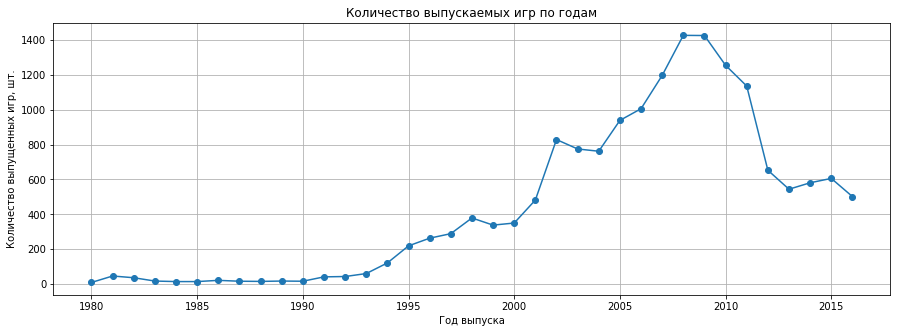

In [24]:
data.pivot_table(index='year_of_release', values='total_sales', aggfunc='count')\
.plot(grid=True, style='o-', figsize=(15, 5), title='Количество выпускаемых игр по годам', legend=False)\
.set(xlabel='Год выпуска', ylabel='Количество выпущенных игр, шт.');

Из графика видно, что с 1980 по 1993 год игровая индустрия зарождалась, и начиная с 1993 по 2009 год количество выпускаемых игр росло год от года с небольшими коррекциями в 1998-2000 и в 2002-2004 годах. С 2009 года видна тенденция к снижению количества выпускаемых игр, но это не связано с кризисом или упадком в индустрии, а скорее с развитием технологий и с тем, что производители начали все больше делать ставку на качество своего продукта.

#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам. Посмотрим за какой характерный срок появляются новые и исчезают старые платформы.

Построим сводную таблицу по суммарным продажам по платформам, возьмем первые 20 строк и построим столбчатую диаграмму для наглядности.

In [25]:
platform_total_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).reset_index().head(20)
platform_total_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


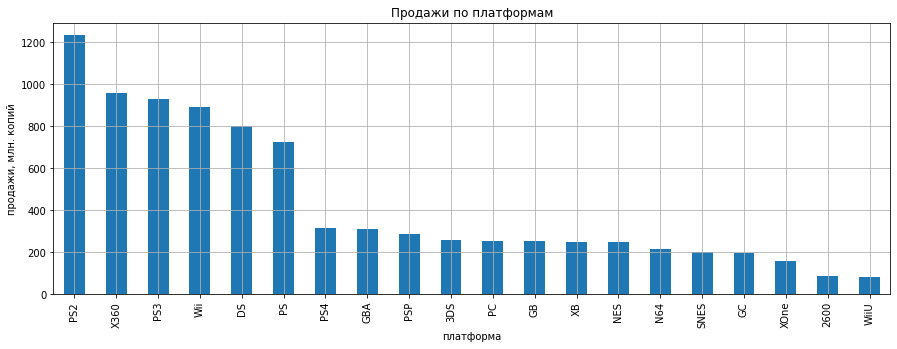

In [26]:
platform_total_sales.plot(x='platform', y='total_sales', kind='bar', grid=True, figsize=(15, 5), 
                          title='Продажи по платформам', legend=False).set(xlabel='платформа', ylabel='продажи, млн. копий');

Из диаграммы видно, что на фоне всех выделяются шесть платформ, это соответствует действительности, ведь исторически сложилось, что на рынке игровых консолей доминируют три конкурирующих компании: Sony, Microsoft и Nintendo. По этим шести платформам и будем строить распределение по годам.

In [27]:
# создадим список самых популярных платформ
top_6_platforms = platform_total_sales['platform'].head(6).tolist()
top_6_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

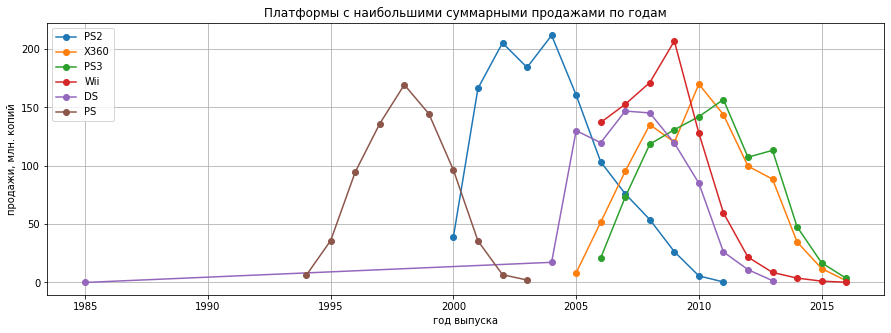

In [28]:
for name in top_6_platforms:
    data.query('platform == @name').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .sort_values('year_of_release', ascending = False)['total_sales']\
    .plot(grid=True, style='o-', figsize=(15, 5), label=name, title='Платформы с наибольшими суммарными продажами по годам')
    plt.xlabel('год выпуска')
    plt.ylabel('продажи, млн. копий')
    plt.legend(loc='upper left')

In [29]:
# посмотрим что за игра была выпущена на платформе DS в 1985 году
data.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,Unknown,0.02


Нельзя не обратить внимание на аномалию на графике платформы Nintendo DS - присутствует игра якобы выпущенная в 1985 году, при том, что сама платфома вышла только в 2004, ошибка либо годе выхода, либо в платформе. Поиск достоверных сведений об этой игре на просторах интернета положительного результата не дал, поэтому удалим эту строку из датасета.

In [30]:
# удаляем строку
data = data.loc[data['name'] != 'Strongest Tokyo University Shogi DS']

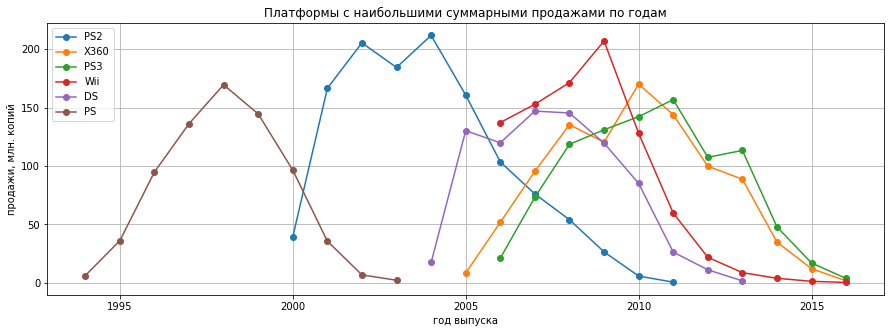

In [31]:
# так график выглядит лучше
for name in top_6_platforms:
    data.query('platform == @name').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .sort_values('year_of_release', ascending = False)['total_sales']\
    .plot(grid=True, style='o-', figsize=(15, 5), label=name, title='Платформы с наибольшими суммарными продажами по годам')
    plt.xlabel('год выпуска')
    plt.ylabel('продажи, млн. копий')
    plt.legend(loc='upper left')

Из графиков распределения по годам видно, что "срок жизни" популярной платформы в среднем составляет порядка 10 лет, что опять же объясняется развитием технологий, и закономерно, что устаревающим поколениям консолей на смену приходят новые, более современные и усовершенствованые.

#### Определение актуального периода, который поможет построить прогноз на 2017 год.

Как было сказано выше, средний "срок жизни" платформы составляет около 10 лет, при этом на графиках видны пики в районе 3-5 лет, после чего начинается постепенный спад продаж и после выхода консоли нового поколения, предыдущая версия "живет" несколько лет (это хорошо видно на графиках консолей Sony Play Station). Поэтому для планирования продаж на 2017 год, будем считать актульным периодом предшествующие 4 года, таким образом в этот промежуток попадут платформы, которые находятся на этапе роста, а также платформы, которые еще не потеряли своей актуальности.

#### Определение платформ, которые лидируют по продажам, растут или падают. Выбор нескольких потенциально прибыльных платформ.

Построим сводную таблицу по суммарным продажам по платформам за период начиная с 2013 года, а также столбчатую диаграмму на ее основе.

In [32]:
actual_period = data.query('year_of_release >= 2013')
actual_period_platform = actual_period.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).reset_index()
actual_period_platform

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


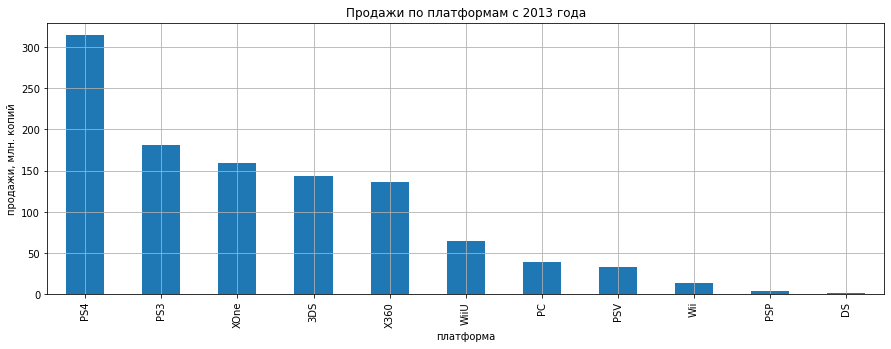

In [33]:
actual_period_platform.plot(x='platform', y='total_sales', kind='bar', grid=True, figsize=(15, 5), 
                            title='Продажи по платформам с 2013 года', legend=False)\
.set(xlabel='платформа', ylabel='продажи, млн. копий');

Из диаграммы видно, что пять платформ с большим преимуществом доминируют на рынке последние 4 года, построим графики распределения по продажам за последние 4 года. 

In [34]:
# создадим список платформ на рынке с 2013 года
platforms_from_2013 = actual_period_platform['platform'].tolist()
platforms_from_2013

['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP', 'DS']

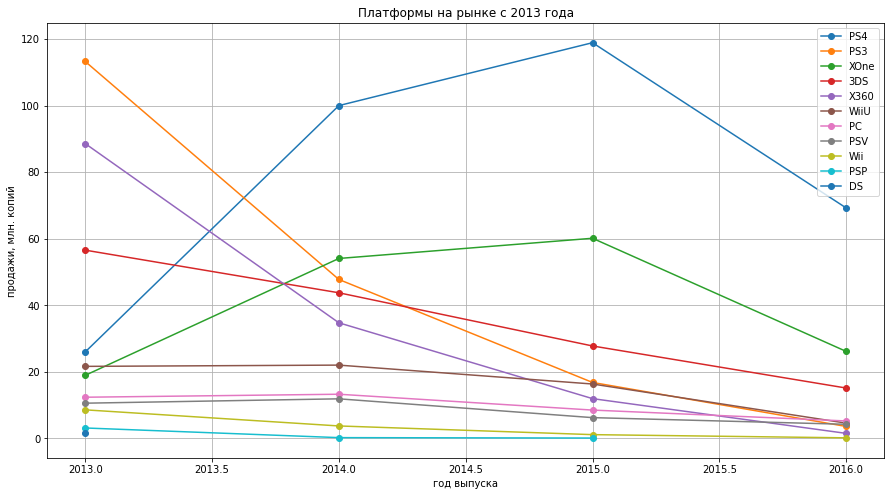

In [35]:
for name in platforms_from_2013:
    actual_period.query('platform == @name').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .sort_values('year_of_release', ascending = False)['total_sales']\
    .plot(grid=True, style='o-', figsize=(15, 8), label=name, title='Платформы на рынке с 2013 года')
    plt.xlabel('год выпуска')
    plt.ylabel('продажи, млн. копий')
    plt.legend(loc='upper right')

Данные за 2016 год учитывать не будем, потому что они могут быть неполными. Из графиков видно, что из всех представленных платформ только `Play Station 4` и `Xbox One` находятся в начале жизненного цикла и растут по количеству продаж год к году. Остальные же платформы либо уже прошли пиковую точку и падают, либо же никогда не показывали большого роста и ввиду того, что они уже прошли больше половины жизненного цикла (исходя из определенного ранее среднего срока существования платформы), то уже навряд ли покажут рост.

Исходя из вышеизложенного, оставляем `Play Station 4` и `Xbox One`, как потенциально прибыльные платформы.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

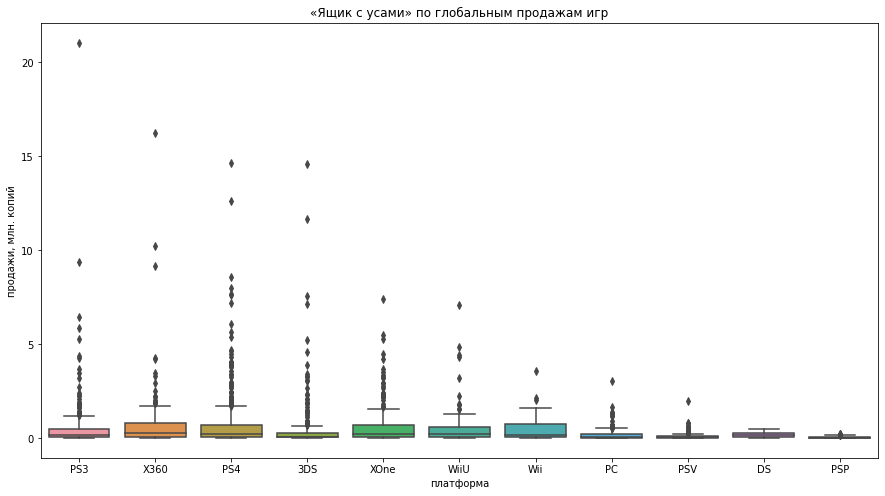

In [36]:
plt.figure(figsize=(15, 8))
box_selected = sns.boxplot(x='platform', y='total_sales', data=actual_period)
plt.xlabel('платформа')
plt.ylabel('продажи, млн. копий')
plt.title('«Ящик с усами» по глобальным продажам игр')
plt.show()

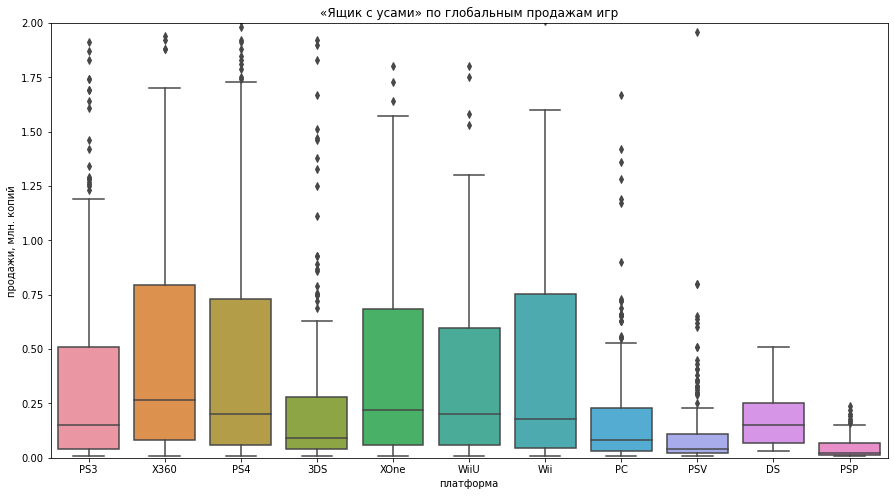

In [37]:
plt.figure(figsize=(15, 8))
box_selected = sns.boxplot(x='platform', y='total_sales', data=actual_period)
box_selected.set(ylim=(0, 2))
plt.xlabel('платформа')
plt.ylabel('продажи, млн. копий')
plt.title('«Ящик с усами» по глобальным продажам игр')
plt.show()

In [38]:
# сводная с общими сведениями по продажам
actual_period.pivot_table(index='platform', values='total_sales', 
                          aggfunc=['count', 'sum', 'mean', 'median', 'min', 'max'])\
.sort_values(('sum', 'total_sales'), ascending=False).reset_index()

,platform,count,sum,mean,median,min,max
,,total_sales,total_sales,total_sales,total_sales,total_sales,total_sales
0,PS4,392,314.14,0.801378,0.200,0.01,14.63
1,PS3,345,181.43,0.525884,0.150,0.01,21.05
2,XOne,247,159.32,0.645020,0.220,0.01,7.39
3,3DS,303,143.25,0.472772,0.090,0.01,14.60
4,X360,186,136.80,0.735484,0.265,0.01,16.27
5,WiiU,115,64.63,0.562000,0.200,0.01,7.09
6,PC,189,39.43,0.208624,0.080,0.01,3.05
7,PSV,358,32.99,0.092151,0.040,0.01,1.96
8,Wii,23,13.66,0.593913,0.180,0.01,3.58


Из диаграммы размаха видно, что по продажам за период с 2013 года лидируют конкурирующие PS4 и Xbox One, PS3 и X360, а также портативная Nintendo 3DS.\
Успех PS4 и Xbox One объясняется тем, что это самые новые платформы на рынке (обе вышли в 2013 году). Они являются переемниками PS3 и X360. Медианное значение количества проданных копий у обеих платформ примерно одинаковое, чего не скажешь об общем количестве проданных копий. У PS4 по сравнению с Xbox One почти в 2 раза больше количество проданных копий и в 1.6 раза больше количество представленных на платформе игр. Это может быть связано с тем, что на платформе PS4 представлено много эксклюзивных игр, которых нет на других платформах. Помимо этого, если посмотреть за пределы третьего квартиля графика, то даже невооруженным глазом видно, что у PS4 гораздо лучше показатели по продаже хитов игровой индустрии, например, если посмотреть на продажи одной из самых популярных игр `Call of Duty: Black Ops 3`, то можно увидеть, что ее продажи на PS4 в 2 раза превышают продажи на Xbox One.\
Из диаграммы также видно, что платформы PS3 и X360 пока еще не потеряли своей актуальности, но уже отдают свои позиции перемникам, и если посмотреть за пределы третьего квартиля графика, то становится понятно, что объем продаж держится за счет продажи хитов игровой индустрии.\
У Nintendo WiiU отностиельно лидирующих платформ небольшое количество и не слишком высокие продажи, но по диаграмме видно, что игры пользуются спросом. У Nintendo 3DS не очень высокое медианное значение, однако большое количество выбросов, которое объясняет такой суммарный объем продаж.

In [39]:
# срез по игре Call of Duty: Black Ops 3
data.query('name == "Call of Duty: Black Ops 3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,Unknown,7.39
1038,Call of Duty: Black Ops 3,X360,2015,Shooter,1.14,0.40,0.00,0.16,NaN,NaN,Unknown,1.70
1051,Call of Duty: Black Ops 3,PS3,2015,Shooter,0.49,0.87,0.07,0.26,NaN,NaN,Unknown,1.69
6363,Call of Duty: Black Ops 3,PC,2015,Shooter,0.00,0.25,0.00,0.01,NaN,NaN,Unknown,0.26


#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Возьмем одну из самых популярных платформ актуального периода - PS4, и посмотрим на корреляцию между отзывами пользователей и критиков и суммарными продажами по этой платформе.

In [40]:
actual_period.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


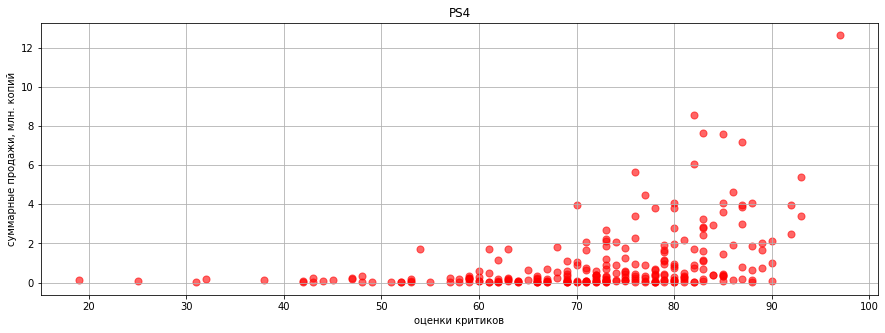

In [41]:
actual_period.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', 
                                     grid=True, figsize=(15, 5), alpha=0.6, color='red', s=50);
plt.ylabel('суммарные продажи, млн. копий')
plt.xlabel('оценки критиков')
plt.title('PS4')
plt.show()

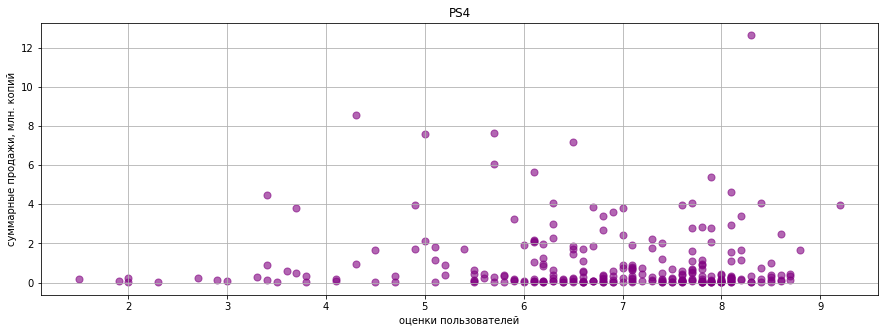

In [42]:
actual_period.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', grid=True, 
                                     figsize=(15, 5), alpha=0.6, color='purple', s=50);
plt.ylabel('суммарные продажи, млн. копий')
plt.xlabel('оценки пользователей')
plt.title('PS4')
plt.show()

Корреляция следующая: 
- между оценками критиков и продажами связь средняя положительная;
- между оценками пользователей и продажами связь практически отсутствует.

Построенные диаграммы рассеяния подтверждают полученные коэффициенты корреляции. Между оценками критиков и продажами прослеживается некая взаимосвязь, но не очень явная. Между оценками пользователей и продажами взаимосвязь практически не видна.

#### Соотнесем выводы с продажами игр на других платформах.

Посмотрим на коэффициенты корреляции между отзывами и продажами по другим четырем лидирующим платформам после PS4 за период начиная с 2013 года.

In [43]:
# возьмем другие 4 лидирующие платформы после PS4 с 2013 года
top_sales = ['PS3', 'X360', '3DS', 'XOne']

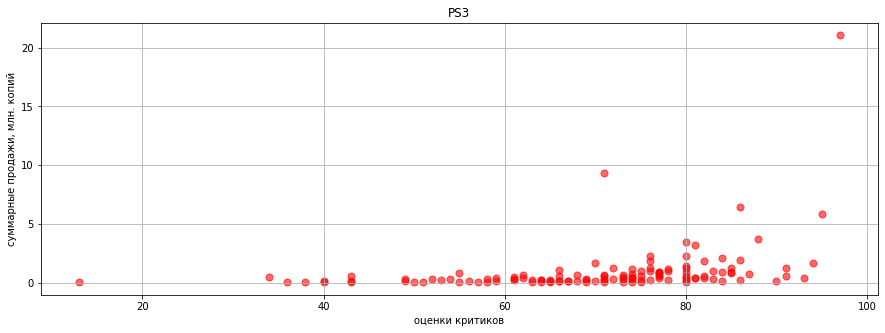

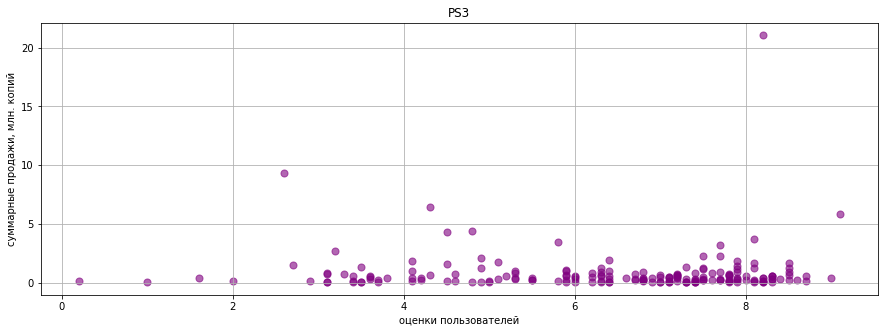

Коэффициент корреляции между оценками критиков и продажами: 0.33
Коэффициент корреляции между оценками пользователей и продажами: 0.0
___________________________________________________________________________________________________________________


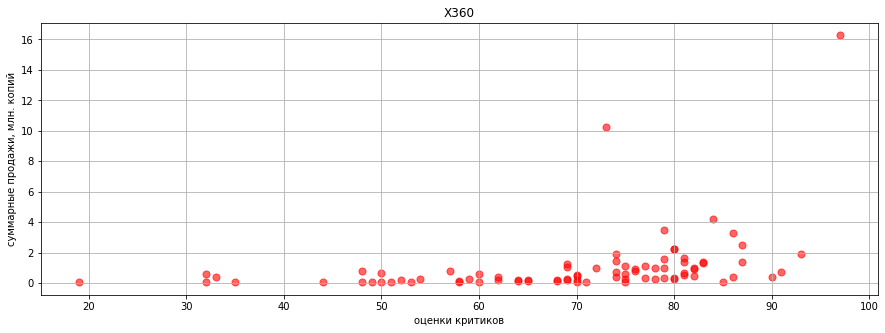

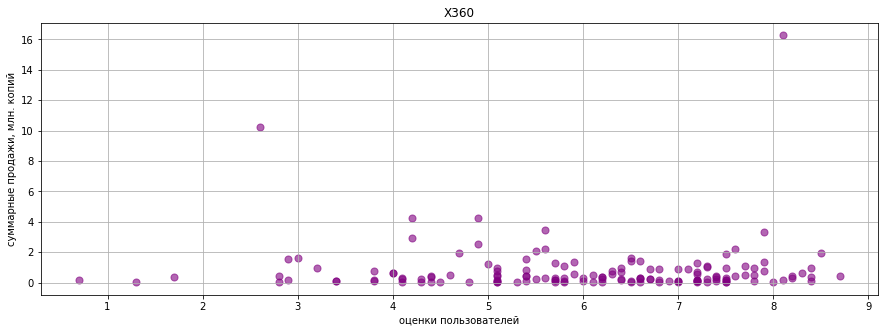

Коэффициент корреляции между оценками критиков и продажами: 0.35
Коэффициент корреляции между оценками пользователей и продажами: -0.01
___________________________________________________________________________________________________________________


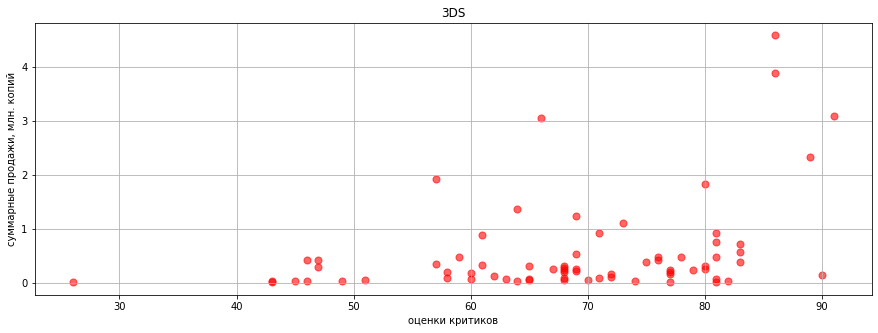

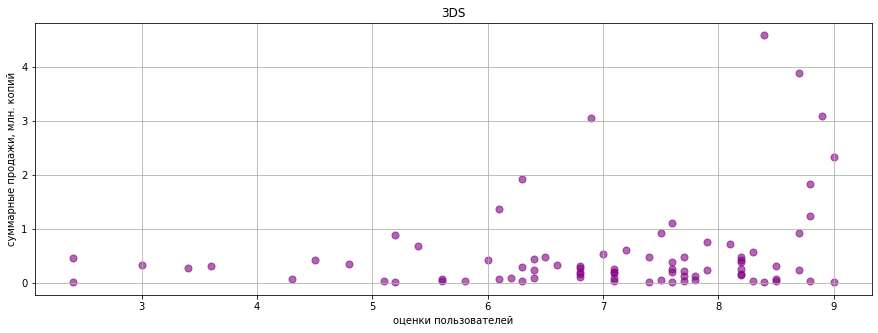

Коэффициент корреляции между оценками критиков и продажами: 0.36
Коэффициент корреляции между оценками пользователей и продажами: 0.24
___________________________________________________________________________________________________________________


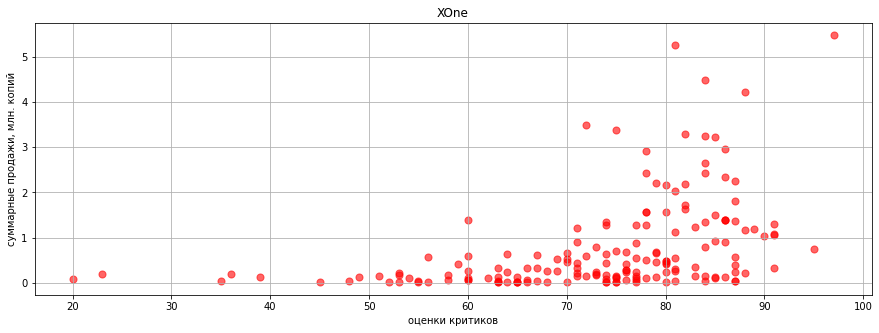

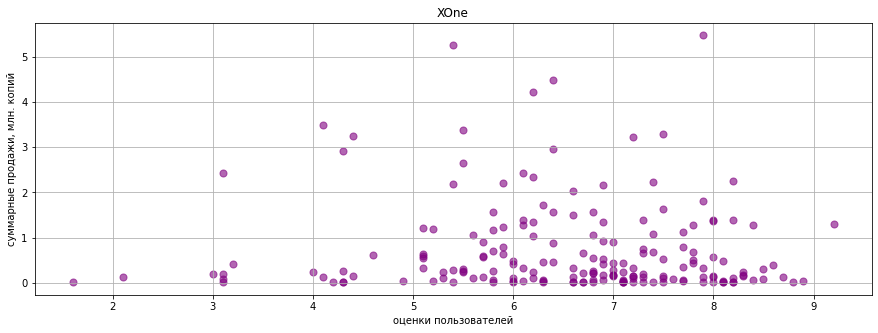

Коэффициент корреляции между оценками критиков и продажами: 0.42
Коэффициент корреляции между оценками пользователей и продажами: -0.07
___________________________________________________________________________________________________________________


In [44]:
# через цикл построим диаграммы рассеяния и рассчитаем коэффициенты корреляции
for platform in top_sales:
    name = actual_period[actual_period['platform'] == platform]    
    name.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, 
                                     figsize=(15, 5), alpha=0.6, color='red', s=50);
    plt.ylabel('суммарные продажи, млн. копий')
    plt.xlabel('оценки критиков')
    plt.title(platform)
    plt.show()
    
    name.plot(x='user_score', y='total_sales', kind='scatter', grid=True, 
                                     figsize=(15, 5), alpha=0.6, color='purple', s=50);
    plt.ylabel('суммарные продажи, млн. копий')
    plt.xlabel('оценки пользователей')
    plt.title(platform)
    plt.show()
    
    corr_critic_score = name['critic_score'].corr(name['total_sales'])
    corr_user_score = name['user_score'].corr(name['total_sales'])

    print('Коэффициент корреляции между оценками критиков и продажами:', corr_critic_score.round(2))
    print('Коэффициент корреляции между оценками пользователей и продажами:', corr_user_score.round(2))
    print('_' * 115)

Построенные для четырех платформ диаграммы рассеяния и коэффициенты корреляции показывают, что взаимосвязь между оценками критиков и продажами присутствует, хоть и не слишком сильная. Между оценками пользователей и продажами взаимосвязь практически не прослеживается, за исключением платформы Nintendo 3DS, здесь слабая взаимосвязь все же есть.

Исходя из вышесказанного можно сделать вывод, что оценка критиков в гораздо большей степени влияет на продажи, чем оценка пользователей, возможно, это связано с тем, что критики могут иметь ранний доступ к игре, а пользователи ставят свои оценки уже после релиза (тосле того, как поиграют) и после того, как критики озвучили свое мнение.

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Построим сводную таблицу по медианным значениям продаж по жанрам по всем платформам за период начиная с 2013 года, а также столбчатую диаграмму на ее основе.

In [45]:
actual_period_genre = actual_period.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.sort_values(by='total_sales', ascending=False).reset_index()

# добавим столбец, отображающий % от общих продаж
actual_period_genre['%_of_total_sales'] = (actual_period_genre['total_sales'] / actual_period_genre['total_sales']\
                                           .sum() * 100).round(2)
actual_period_genre

,genre,total_sales,%_of_total_sales
0,Shooter,0.450,25.50
1,Sports,0.240,13.60
2,Platform,0.225,12.75
3,Role-Playing,0.125,7.08
4,Fighting,0.125,7.08
5,Racing,0.120,6.80
6,Action,0.110,6.23
7,Simulation,0.100,5.67
8,Misc,0.100,5.67
9,Strategy,0.080,4.53


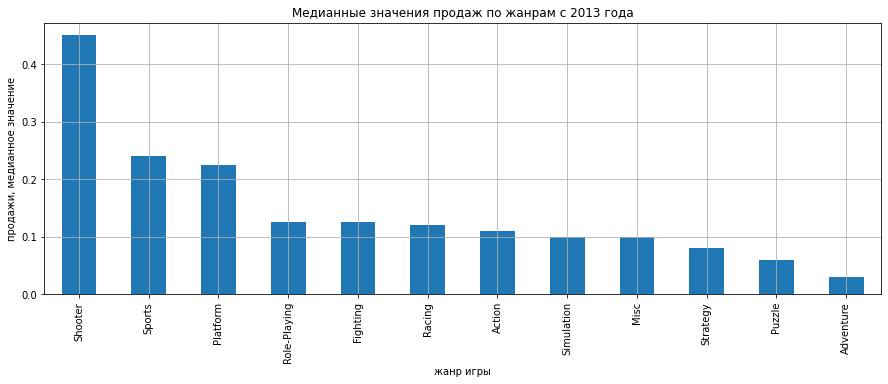

In [46]:
actual_period_genre.plot(x='genre', y='total_sales', kind='bar', grid=True, figsize=(15, 5), 
                         title='Медианные значения продаж по жанрам с 2013 года', legend=False)\
.set(xlabel='жанр игры', ylabel='продажи, медианное значение');

Для наглядности, также построим диаграммы размаха по продажам по жанрам.

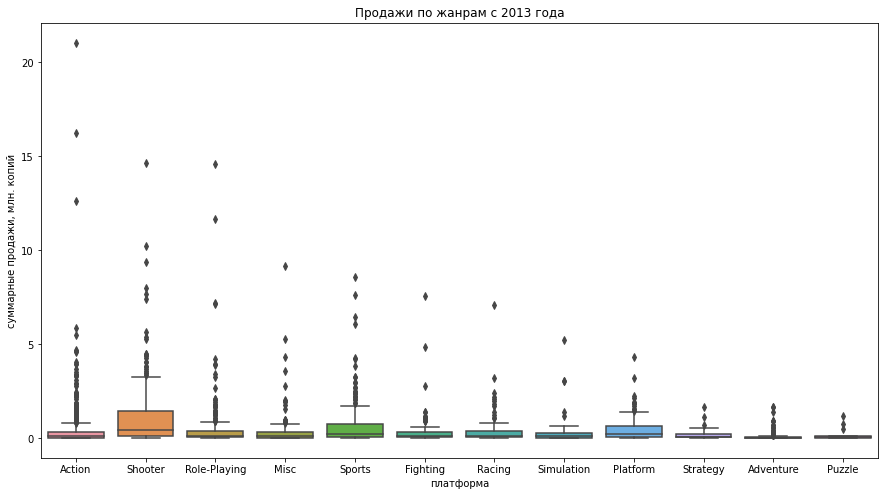

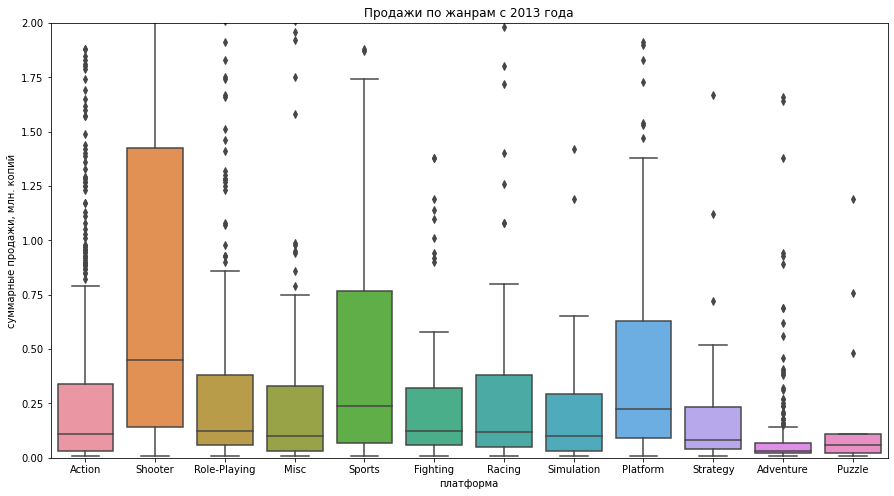

In [47]:
plt.figure(figsize=(15, 8))
box_genre = sns.boxplot(x='genre', y='total_sales', data=actual_period)
plt.xlabel('платформа')
plt.ylabel('суммарные продажи, млн. копий')
plt.title('Продажи по жанрам с 2013 года')
plt.show()

plt.figure(figsize=(15, 8))
box_genre = sns.boxplot(x='genre', y='total_sales', data=actual_period)
box_genre.set(ylim=(0, 2))
plt.xlabel('платформа')
plt.ylabel('суммарные продажи, млн. копий')
plt.title('Продажи по жанрам с 2013 года')
plt.show()

Из диаграммы видно, что лидерами продаж являются игры жанра Shooter, на них приходится **25.50%** медианных продаж. Также достаточно большую долю на рынке имеют жанры Sports и Platform - **13.60%** и **12.75%**, соответственно. Остальные жанры занимают меньшую долю, при этом наименее популярными жанрами являются Puzzle (**3.40%**) и Adventure (**1.70%**).

**Резюме по исследовательскому анализу.**

С 1980 по 1993 год игровая индустрия зарождалась, и начиная с 1993 по 2009 год количество выпускаемых игр росло год от года с небольшими коррекциями в 1998-2000 и в 2002-2004 годах. С 2009 года видна тенденция к снижению количества выпускаемых игр, но это не связано с кризисом или упадком в индустрии, а скорее с развитием технологий и с тем, что производители начали все больше делать ставку на качество своего продукта.

В ходе анализа выснилось, что рынке игровых консолей доминируют три конкурирующих компании: Sony, Microsoft и Nintendo. Также определили, что "срок жизни" популярной платформы в среднем составляет порядка 10 лет, что объясняется развитием технологий, и закономерно, что устаревающим поколениям консолей на смену приходят новые, более современные и усовершенствованые.

Поэтому для планирования продаж на 2017 год взяли актульный период за предшествующие 4 года, чтобы определить платформы, которые находятся на этапе роста, а также платформы, которые еще не потеряли своей актуальности. Из всех представленных платформ нас заинтересовали только `Play Station 4` и `Xbox One`, т.к. они находятся в начале жизненного цикла и растут по количеству продаж год к году. Остальные же платформы, как показал анализ, либо уже прошли пиковую точку и падают, либо же никогда не показывали большого роста и ввиду того, что они уже прошли больше половины жизненного цикла (исходя из определенного ранее среднего срока существования платформы), то уже навряд ли покажут рост.

Исходя из вышеизложенного, взяли `Play Station 4` и `Xbox One` для дальнейшего анализа, как потенциально прибыльные платформы.

Более пристально рассмотрев выбранный актуальный период определили, что по продажам за период с 2013 года лидируют конкурирующие PS4 и Xbox One, PS3 и X360, а также портативная Nintendo 3DS.\
Успех PS4 и Xbox One объясняется тем, что это самые современные платформы на рынке (обе вышли в 2013 году). Платформы PS3 и X360 пока еще не потеряли своей актуальности, но уже отдают свои позиции перемникам. У портативной Nintendo 3DS не очень высокое медианное значение суммарных продаж, однако на платформе присутствует большое количество игр, ставших хитами и за счет которых достигается достаточно большой объем суммарных продаж.

Далее посмотрели на корреляцию между отзывами пользователей и критиков и суммарными продажами по каждой из популярных платформ и построили диаграммы рассеяния. Коэффициенты и диаграммы не показали сильной прямой линейной связи, однако между оценками критиков и продажами средняя положительная связь все-таки присутствует, чего незьзя сказать о связи между оценками пользователей и продажами - там она стремится к нулю.

Затем проверили распределение игр по жанрам и выявили жанры с самыми высокими и самыми низкими продажами:
- лидерами продаж являются игры жанра Shooter, на них приходится **25.50%** медианных продаж;
- жанры Sports и Platform занимают **13.60%** и **12.75%**, соответственно;
- наименее популярными жанрами являются Puzzle (**3.40%**) и Adventure (**1.70%**).

### Портрет пользователя каждого региона

#### Самые популярные платформы (топ-5). 

Построим круговые диаграммы для топ-5 платформ по каждому региону, а невошедшие в топ-5 соберем в группу 'other_platforms'.

In [48]:
actual_platforms = actual_period.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], 
                                                aggfunc='sum').reset_index()
actual_platforms

,platform,eu_sales,jp_sales,na_sales
0,3DS,30.96,67.81,38.20
1,DS,0.85,0.00,0.57
2,PC,25.36,0.00,11.11
3,PS3,67.81,23.35,63.50
4,PS4,141.09,15.96,108.74
5,PSP,0.17,3.29,0.00
6,PSV,6.10,18.59,5.04
7,Wii,5.93,0.05,6.56
8,WiiU,19.85,10.88,29.21
9,X360,42.52,0.51,81.66


In [49]:
# определяем жанры, входящие в топ-5 для каждого региона
top_platforms_na = (actual_platforms.nlargest(5, 'na_sales')['platform']).tolist()
display(top_platforms_na)
top_platforms_eu = (actual_platforms.nlargest(5, 'eu_sales')['platform']).tolist()
display(top_platforms_eu)
top_platforms_jp = (actual_platforms.nlargest(5, 'jp_sales')['platform']).tolist()
display(top_platforms_jp)

['PS4', 'XOne', 'X360', 'PS3', '3DS']

['PS4', 'PS3', 'XOne', 'X360', '3DS']

['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']

In [50]:
# добавим столбцы с рейтингом для каждого региона c топ-5 платформами, а остальными other_platforms
actual_period = (actual_period.assign(na_platforms = actual_period.platform))
actual_period.loc[(actual_period['na_platforms'] != 'PS4')\
                  & (actual_period['na_platforms'] != 'XOne')\
                  & (actual_period['na_platforms'] != 'X360')\
                  & (actual_period['na_platforms'] != 'PS3')\
                  & (actual_period['na_platforms'] != '3DS'), 'na_platforms'] = 'other_platforms'

actual_period = (actual_period.assign(eu_platforms = actual_period.platform))
actual_period.loc[(actual_period['eu_platforms'] != 'PS4')\
                  & (actual_period['eu_platforms'] != 'PS3')\
                  & (actual_period['eu_platforms'] != 'XOne')\
                  & (actual_period['eu_platforms'] != 'X360')\
                  & (actual_period['eu_platforms'] != '3DS'), 'eu_platforms'] = 'other_platforms'

actual_period = (actual_period.assign(jp_platforms = actual_period.platform))
actual_period.loc[(actual_period['jp_platforms'] != '3DS')\
                  & (actual_period['jp_platforms'] != 'PS3')\
                  & (actual_period['jp_platforms'] != 'PSV')\
                  & (actual_period['jp_platforms'] != 'PS4')\
                  & (actual_period['jp_platforms'] != 'WiiU'), 'jp_platforms'] = 'other_platforms'


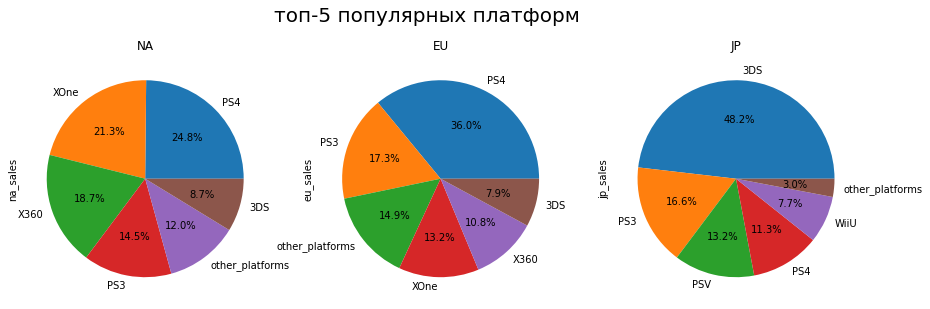

In [51]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('топ-5 популярных платформ', fontsize=20)

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

(actual_period.groupby(by='na_platforms').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)\
             .plot(kind='pie', legend = False, ax=ax1, subplots=True, autopct='%1.1f%%'))
(actual_period.groupby(by='eu_platforms').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)\
             .plot(kind='pie', legend = False, ax=ax2, subplots=True, autopct='%1.1f%%'))
(actual_period.groupby(by='jp_platforms').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)\
             .plot(kind='pie', legend = False, ax=ax3, subplots=True, autopct='%1.1f%%'))

ax1.set_title('NA')
ax2.set_title('EU')
ax3.set_title('JP');

В Северной Америке платформы Sony занимают около **40%** рынка (PS4 - **25%**, PS3 - **15%**) и платформы Microsoft **40%** (XOne - **21%**, X360 - **19%**), на остальные платформы приходится порядка **20%**.

В Европе платформы Sony занимают порядка **53%** рынка (PS4 - **36%**, PS3 - **17%**), платформы Microsoft **24%** (XOne - **13%**, X360 - **11%**), на остальные платформы приходится **23%**.

А в Японии большую часть рынка занимают платформы Nintendo - **56%**, в частности портативная 3DS - **48%** и WiiU - **8%**, платформы Sony - **41%** (PS3 - **17%**, PSV - **13%**, PS4 - **11%**), остальные платформы - **3%**. Интересный факт, что платформы Microsoft не пользуются спросом в Японии.

#### Самые популярные жанры (топ-5).

Построим круговые диаграммы для топ-5 жанров по каждому региону, а невошедшие в топ-5 соберем в группу 'other_genres'.

In [52]:
actual_genres = actual_period.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], 
                                                aggfunc='sum').reset_index()
actual_genres

,genre,eu_sales,jp_sales,na_sales
0,Action,118.13,40.49,126.05
1,Adventure,8.25,5.82,7.14
2,Fighting,8.55,7.65,15.55
3,Misc,20.04,9.20,27.49
4,Platform,15.58,4.79,18.14
5,Puzzle,1.00,1.18,0.83
6,Racing,20.19,2.30,12.96
7,Role-Playing,36.97,51.04,46.40
8,Shooter,87.86,6.61,109.74
9,Simulation,10.92,4.52,4.86


In [53]:
# определяем жанры, входящие в топ-5 для каждого региона
top_genres_na = (actual_genres.nlargest(5, 'na_sales')['genre']).tolist()
display(top_genres_na)
top_genres_eu = (actual_genres.nlargest(5, 'eu_sales')['genre']).tolist()
display(top_genres_eu)
top_genres_jp = (actual_genres.nlargest(5, 'jp_sales')['genre']).tolist()
display(top_genres_jp)

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']

['Role-Playing', 'Action', 'Misc', 'Fighting', 'Shooter']

In [54]:
# добавим столбцы с рейтингом для каждого региона с топ-5 жанрами, а остальными other_genres
actual_period = (actual_period.assign(na_genres = actual_period.genre))
actual_period.loc[(actual_period['na_genres'] != 'Action')\
                  & (actual_period['na_genres'] != 'Shooter')\
                  & (actual_period['na_genres'] != 'Sports')\
                  & (actual_period['na_genres'] != 'Role-Playing')\
                  & (actual_period['na_genres'] != 'Misc'), 'na_genres'] = 'other_genres'

actual_period = (actual_period.assign(eu_genres = actual_period.genre))
actual_period.loc[(actual_period['eu_genres'] != 'Action')\
                  & (actual_period['eu_genres'] != 'Shooter')\
                  & (actual_period['eu_genres'] != 'Sports')\
                  & (actual_period['eu_genres'] != 'Role-Playing')\
                  & (actual_period['eu_genres'] != 'Racing'), 'eu_genres'] = 'other_genres'

actual_period = (actual_period.assign(jp_genres = actual_period.genre))
actual_period.loc[(actual_period['jp_genres'] != 'Role-Playing')\
                  & (actual_period['jp_genres'] != 'Action')\
                  & (actual_period['jp_genres'] != 'Misc')\
                  & (actual_period['jp_genres'] != 'Fighting')\
                  & (actual_period['jp_genres'] != 'Shooter'), 'jp_genres'] = 'other_genres'

display(actual_period.head(55))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,na_platforms,eu_platforms,jp_platforms,na_genres,eu_genres,jp_genres
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,PS3,PS3,PS3,Action,Action,Action
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,X360,X360,other_platforms,Action,Action,Action
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63,PS4,PS4,PS4,Shooter,Shooter,Shooter
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60,3DS,3DS,3DS,Role-Playing,Role-Playing,Role-Playing
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,PS4,PS4,PS4,Action,Action,Action
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68,3DS,3DS,3DS,Role-Playing,Role-Playing,Role-Playing
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24,X360,X360,other_platforms,Shooter,Shooter,Shooter
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36,PS3,PS3,PS3,Shooter,Shooter,Shooter
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,Unknown,9.18,X360,X360,other_platforms,Misc,other_genres,Misc
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,PS4,PS4,PS4,Sports,Sports,other_genres


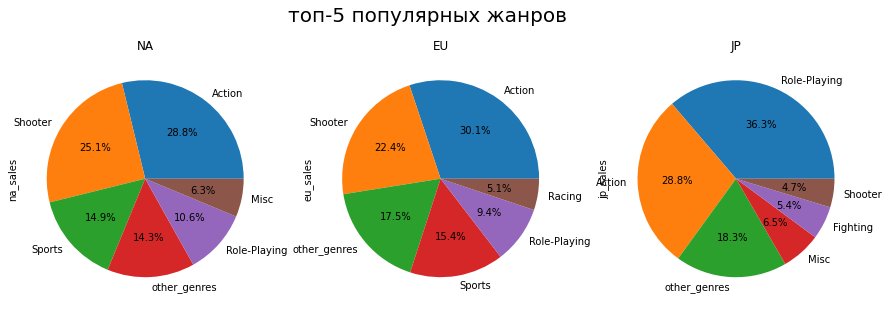

In [55]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('топ-5 популярных жанров', fontsize=20)

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

(actual_period.groupby(by='na_genres').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)\
             .plot(kind='pie', legend = False, ax=ax1, subplots=True, autopct='%1.1f%%'))
(actual_period.groupby(by='eu_genres').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)\
             .plot(kind='pie', legend = False, ax=ax2, subplots=True, autopct='%1.1f%%'))
(actual_period.groupby(by='jp_genres').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)\
             .plot(kind='pie', legend = False, ax=ax3, subplots=True, autopct='%1.1f%%'))

ax1.set_title('NA')
ax2.set_title('EU')
ax3.set_title('JP');

В Америке и Европе жанровые предпочтения схожы, диаграммы выглядят очень практически одинаково, первые четыре места занимают одни и те же жанры с примерно одинаковыми пропорциями. Более **50%** этих рынков занимают жанры Action и Shooter.

В Японии вкусы несколько другие, большую часть рынка занимают два жанра: первое место занимает RPG (**36%**), на втором Action (**29%**).

#### Влияние рейтинга ESRB на продажи в отдельном регионе.



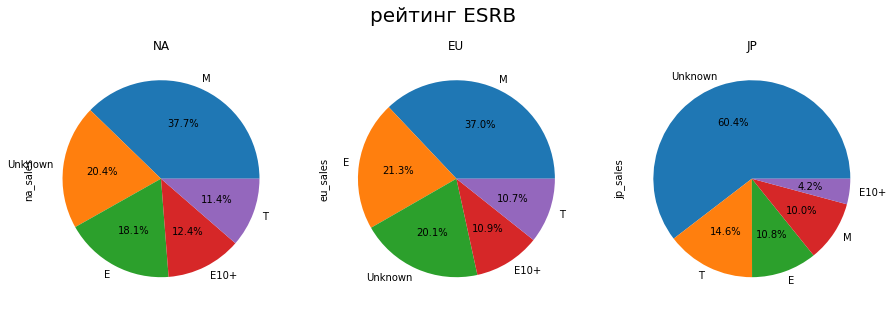

In [56]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('рейтинг ESRB', fontsize=20)

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

(actual_period.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)\
             .plot(kind='pie', legend = False, ax=ax1, subplots=True, autopct='%1.1f%%'))
(actual_period.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)\
             .plot(kind='pie', legend = False, ax=ax2, subplots=True, autopct='%1.1f%%'))
(actual_period.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)\
             .plot(kind='pie', legend = False, ax=ax3, subplots=True, autopct='%1.1f%%'))

ax1.set_title('NA')
ax2.set_title('EU')
ax3.set_title('JP');

По возрастному рейтингу у Северной Америки и Европы распределение, также как и по жанрам, практически полностью совпадает, большинство продаваемых игр с рейтингом "M" ("Для взрослых") (около **37%**) и "E" ("Для всех") (Америка - **18%**, Европа - **21%**).

В Японии **60%** продаваемых игр не проставлен рейтинг ESRB, по причине того, что данная организация присваивает рейтинг для  видеоигр в **США и Канаде**. Среди продаж игр, для которых рейтинг проставлен преобладает "T" ("Подросткам") (около **15%**) и "E" ("Для всех") (около **11%**).

**Вывод:**

В Северной Америке и Европе портреты пользователя схожи: 
- наиболее популярны там платформы PS4 и XOne;
- жанровые предпочтения - Action и Shooter;
- возрастной рейтинг "Для взрослых" и "Для всех".

В Японии портрет пользователя выглядит так:
- огомной популярностью пользуются платформы Nintendo, особенно портативная 3DS;
- предпочтения отдаются жанрам RPG и Action;
- возрастной рейтинг ESRB по большей части не известен, но из того, что известно преобладают "Для всех" и "Подросткам".

### Проверка гипотез

#### Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
Сформулируем нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Эта гипотеза двусторонняя. Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем, как противоположную нулевой.\
Для проверки возьмем данные двух выборок. Так как мы будем сравнивать средние двух выборок, то применим T-критерий Стюдента при помощи метода **scipy.stats.ttest_ind()**. Так как выборки разного размера и/или можно предположить, что дисперсии у выборок разные, укажем параметр `equal_var=False`.\
Уровень значимости (p-value) возьмем общепринятый - 0.05. Это означает, что вероятность отвергнуть верную нулевую гипотезу равна 5%.
```
H_0: Средние пользовательские рейтинги (user_score) платформы Xbox One = средние пользовательские рейтинги (user_score) платформы PC`
H_1: Средние пользовательские рейтинги (user_score) платформы Xbox One ≠ средние пользовательские рейтинги (user_score) платформы PC`
alpha = 0.05
```

In [57]:
xone = actual_period.query('platform == "XOne" and user_score.notna()')
pc = actual_period.query('platform == "PC" and user_score.notna()')
results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False) # вызов метода для проверки гипотезы

alpha = .05 # значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    # условный оператор с выводом строки с ответом

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [58]:
print('Средний пользовательский рейтинг платформы Xbox One:', xone['user_score'].mean())
print('Средний пользовательский рейтинг платформы PC:', pc['user_score'].mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC: 6.2696774193548395


Вероятность того, что средние пользовательские рейтинги платформ Xbox One и PC будут одинаковыми около 15%, это достаточно высокая вероятность, поэтому отвергнуть данную гипотезу мы не можем.\
Действительно, если посмотреть на рейтинги, то можно увидеть, что они не так уж сильно различаются.

#### Гипотеза: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим гипотезу, что cредние пользовательские рейтинги жанров Action и Sports разные.\
Сформулируем нулевую гипотезу о том, что cредние пользовательские рейтинги жанров Action и Sports **одинаковые**. Эта гипотеза двусторонняя. Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем, как противоположную нулевой.\
Для проверки возьмем данные двух выборок. Так как мы будем сравнивать средние двух выборок, то применим T-критерий Стюдента при помощи метода **scipy.stats.ttest_ind()**. Так как выборки разного размера и/или можно предположить, что дисперсии у выборок разные, укажем параметр `equal_var=False`.\
Уровень значимости (p-value) возьмем общепринятый - 0.05. Это означает, что вероятность отвергнуть верную нулевую гипотезу равна 5%.
```
H_0: Средние пользовательские рейтинги (user_score) жанра Action = средние пользовательские рейтинги (user_score) жанра Sports
H_1: Средние пользовательские рейтинги (user_score) жанра Action ≠ средние пользовательские рейтинги (user_score) жанра Sports
alpha = 0.05
```

In [59]:
action = actual_period.query('genre == "Action" and user_score.notna()')
sports = actual_period.query('genre == "Sports" and user_score.notna()')
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False) # вызов метода для проверки гипотезы

alpha = .05 # значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    # условный оператор с выводом строки с ответом

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [60]:
print('Средний пользовательский рейтинг жанра Action:', action['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports:', sports['user_score'].mean())

Средний пользовательский рейтинг жанра Action: 6.837532133676092
Средний пользовательский рейтинг жанра Sports: 5.238124999999999


Вероятность того, что cредние пользовательские рейтинги жанров Action и Sports будут одинаковыми ничтожно мала, поэтому отвергнуть гипотезу о том, что cредние пользовательские рейтинги жанров Action и Sports разные мы не можем.\
Если взглянуть на оцениваемые рейтинги, то действительно видно, что они существенно отличаются.

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем, как противоположную нулевой.\
Так как мы будем сравнивать средние двух выборок, то применим метод **scipy.stats.ttest_ind()**. Так как выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные, укажем параметр `equal_var=False`.\
Уровень значимости возьмем общепринятый - 0.05.

### Общий вывод

На начальном этапе сделали предобработку данных:
- Для соблюдения правил хорошего тона и для удобства дальнейшей работы привели названия столбцов к нижнему регистру. 
- Проверили датафрейм на наличие явных/неявных дубликатов, таких обнаружено не было.
- Удалили 271 строку с пропущенными значениями, т.к. не представлялось возможным заполнить эти пропуски корректными значениями. Пропуски в столбцах 'critic_score', 'user_score' и 'rating' также не было возможности заполнить, но удалять их было нельзя из-за большого количества, поэтому в столбцах 'critic_score' и 'user_score' оставили как есть, а в столбце 'rating' заменили заглушкой со значением 'Unknown', чтобы использовать эту заглушку при дальнейшем анализе.
- В столбцах 'year_of_release' и 'user_score' поменяли тип данных на соответствующий содержащейся в данных столбцах информации.
- Добавили столбец 'total_sales', в котором посчитали суммарные продажи во всех регионах.

Далее был проведен исследовательский анализ, и вот что он показал.\
С 1980 по 1993 год игровая индустрия зарождалась, и начиная с 1993 по 2009 год количество выпускаемых игр росло год от года с небольшими коррекциями в 1998-2000 и в 2002-2004 годах. С 2009 года видна тенденция к снижению количества выпускаемых игр, но это не связано с кризисом или упадком в индустрии, а скорее с развитием технологий и с тем, что производители начали все больше делать ставку на качество своего продукта.

В ходе анализа выснилось, что рынке игровых консолей доминируют три конкурирующих компании: Sony, Microsoft и Nintendo. Также определили, что "срок жизни" популярной платформы в среднем составляет порядка 10 лет, что объясняется развитием технологий, и закономерно, что устаревающим поколениям консолей на смену приходят новые, более современные и усовершенствованые.

Поэтому для планирования продаж на 2017 год взяли актульный период за предшествующие 4 года, чтобы определить платформы, которые находятся на этапе роста, а также платформы, которые еще не потеряли своей актуальности. Из всех представленных платформ нас заинтересовали только `Play Station 4` и `Xbox One`, т.к. они находятся в начале жизненного цикла и растут по количеству продаж год к году. Остальные же платформы, как показал анализ, либо уже прошли пиковую точку и падают, либо же никогда не показывали большого роста и ввиду того, что они уже прошли больше половины жизненного цикла (исходя из определенного ранее среднего срока существования платформы), то уже навряд ли покажут рост.

Исходя из вышеизложенного, взяли `Play Station 4` и `Xbox One` для дальнейшего анализа, как потенциально прибыльные платформы.

Более пристально рассмотрев выбранный актуальный период определили, что по продажам за период с 2013 года лидируют конкурирующие PS4 и Xbox One, PS3 и X360, а также портативная Nintendo 3DS.\
Успех PS4 и Xbox One объясняется тем, что это самые современные платформы на рынке (обе вышли в 2013 году). Платформы PS3 и X360 пока еще не потеряли своей актуальности, но уже отдают свои позиции перемникам. У портативной Nintendo 3DS не очень высокое медианное значение суммарных продаж, однако на платформе присутствует большое количество игр, ставших хитами и за счет которых достигается достаточно большой объем суммарных продаж.

Далее посмотрели на корреляцию между отзывами пользователей и критиков и суммарными продажами по каждой из популярных платформ и построили диаграммы рассеяния. Коэффициенты и диаграммы не показали сильной прямой линейной связи, однако между оценками критиков и продажами средняя положительная связь все-таки присутствует, чего незьзя сказать о связи между оценками пользователей и продажами - там она стремится к нулю.

Затем проверили распределение игр по жанрам и выявили жанры с самыми высокими и самыми низкими продажами:
- лидерами продаж являются игры жанра Shooter, на них приходится **25.50%** медианных продаж;
- жанры Sports и Platform занимают **13.60%** и **12.75%**, соответственно;
- наименее популярными жанрами являются Puzzle (**3.40%**) и Adventure (**1.70%**).

Затем попытались составить портрет пользователя для каждого региона. Вот что из этого получилось.

В Северной Америке и Европе портреты пользователя схожи: 
- наиболее популярны там платформы PS4 и XOne;
- жанровые предпочтения - Action и Shooter;
- возрастной рейтинг "Для взрослых" и "Для всех".

В Японии портрет пользователя выглядит так:
- огомной популярностью пользуются платформы Nintendo, особенно портативная 3DS;
- предпочтения отдаются жанрам RPG и Action;
- возрастной рейтинг ESRB по большей части не известен, но из того, что известно преобладают "Для всех" и "Подросткам".

В довершение исследования проверили несколько гипотез, которые не смогли отвергнуть.

Таким образом, на основе проведенного анализа, при планировании рекламных кампаний на 2017 год, можно порекомендовать рекламному отделу акцентировать внимание на следующих моментах:
1. Платформы:
- PS4 и XOne (Северная Америка и Европа);
- Nintendo 3DS (Япония).
2. Жанры:
- Action и Shooter (Северная Америка и Европа);
- Nintendo 3DS (Япония).
3. Рейтинг ESRB:
- "Для взрослых" и "Для всех" (Северная Америка и Европа);
- не применим для Японии.
4. Оценки критиков/пользователей:
- Северная Америка и Европа: с осторожностью относиться к оценкам критиков. Оценки пользователей не учитывать;
- Япония: с осторожностью можно прислушиваться к оценкам критиков и пользователей.